In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
import matplotlib

In [33]:
df = pd.read_csv("太極.csv",header=None)
df.columns = ["x1", 'x2','label','1','2']
df["x1^2"] = df["x1"]**2
df["x2^2"] = df["x2"]**2

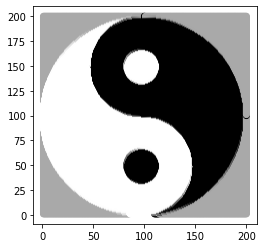

In [34]:
colors = ['darkgrey','white','black']
fig = plt.figure(figsize=(4,4))
plt.scatter(df['x1'],df['x2'],c = df['label'],cmap=matplotlib.colors.ListedColormap(colors))

In [35]:
data =df[["x1","x2","x1^2","x2^2","label"]].values

In [36]:
train_data, test_data = train_test_split(data, random_state=777, train_size=0.8)
#train_data,test_data

In [37]:
x_train, x_test = train_data[:,[0,1,2,3]].astype(np.float32), test_data[:,[0,1,2,3]].astype(np.float32)
y_train, y_test = train_data[:,[4]].astype(np.float32), test_data[:,[4]].astype(np.float32)
#x_train, x_test, y_train, y_test

In [38]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [39]:
model = Sequential()

model.add(Dense(4, input_shape=(4,))) #, activation="relu"
model.add(Dense(16, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(16, activation="relu")) #sigmoid
model.add(Dense(16, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(3, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_12 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 51        
Total params: 695
Trainable params: 695
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
32000/32000 [==============================] - 0s 13us/step - loss: 0.1532 - accuracy: 0.9354
Epoch 2/200
32000/32000 [==============================] - 0s 9us/step - loss: 0.1607 - accuracy: 0.9329
Epoch 3/200
32000/32000 [==============================] - 0s 9us/step - loss: 0.2010 - accuracy: 0.9217
Epoch 4/200
32000/32000 [==============================] - 0s 7us/step - loss: 0.1455 - accuracy: 0.9397
Epoch 5/200
32000/32000 [==============================] - 0s 6us/step - loss: 0.1796 - accuracy: 0.9283
Epoch 6/200
32000/32000 [==============================] - 0s 6us/step - loss: 0.1637 - accuracy: 0.9329
Epoch 7/200
32000/32000 [==============================] - 0s 6us/step - loss: 0.1644 - accuracy: 0.9332
Epoch 8/200
32000/32000 [==============================] - 0s 7us/step - loss: 0.1419 - accuracy: 0.9405
Epoch 9/200
32000/32000 [==============================] - 0s 8us/step - loss: 0.1684 - accuracy: 0.9333
Epoch 10/200
32000/32000 [============================

32000/32000 [==============================] - 0s 6us/step - loss: 0.1069 - accuracy: 0.9549
Epoch 79/200
32000/32000 [==============================] - 0s 6us/step - loss: 0.1223 - accuracy: 0.9478
Epoch 80/200
32000/32000 [==============================] - 0s 6us/step - loss: 0.1352 - accuracy: 0.9447
Epoch 81/200
32000/32000 [==============================] - 0s 6us/step - loss: 0.1079 - accuracy: 0.9542
Epoch 82/200
32000/32000 [==============================] - 0s 7us/step - loss: 0.1487 - accuracy: 0.9427
Epoch 83/200
32000/32000 [==============================] - 0s 6us/step - loss: 0.1156 - accuracy: 0.9499
Epoch 84/200
32000/32000 [==============================] - 0s 6us/step - loss: 0.1392 - accuracy: 0.9425
Epoch 85/200
32000/32000 [==============================] - 0s 7us/step - loss: 0.1110 - accuracy: 0.9533
Epoch 86/200
32000/32000 [==============================] - 0s 6us/step - loss: 0.1204 - accuracy: 0.9503
Epoch 87/200
32000/32000 [==============================] -

32000/32000 [==============================] - 0s 8us/step - loss: 0.1028 - accuracy: 0.9558
Epoch 155/200
32000/32000 [==============================] - 0s 8us/step - loss: 0.1181 - accuracy: 0.9519
Epoch 156/200
32000/32000 [==============================] - 0s 7us/step - loss: 0.1171 - accuracy: 0.9511
Epoch 157/200
32000/32000 [==============================] - 0s 7us/step - loss: 0.1382 - accuracy: 0.9473
Epoch 158/200
32000/32000 [==============================] - 0s 7us/step - loss: 0.1155 - accuracy: 0.9514
Epoch 159/200
32000/32000 [==============================] - 0s 7us/step - loss: 0.1189 - accuracy: 0.9498
Epoch 160/200
32000/32000 [==============================] - 0s 7us/step - loss: 0.1114 - accuracy: 0.9532
Epoch 161/200
32000/32000 [==============================] - 0s 7us/step - loss: 0.1007 - accuracy: 0.9577
Epoch 162/200
32000/32000 [==============================] - 0s 6us/step - loss: 0.1224 - accuracy: 0.9498
Epoch 163/200
32000/32000 [========================

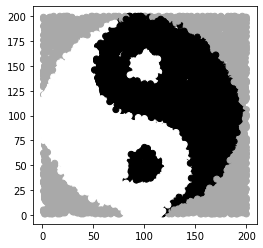

In [42]:
model.fit(x_train,Y_train, epochs=200, batch_size=200, verbose=1)
loss, accuracy = model.evaluate(x_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
y_pred = model.predict_classes(x_test, batch_size=200, verbose=1)
fig = plt.figure(figsize=(4,4))
plt.scatter(x_test[:,0],x_test[:,1],c = y_pred,cmap=matplotlib.colors.ListedColormap(colors))
#print(y_pred[0], y_pred[1]) 

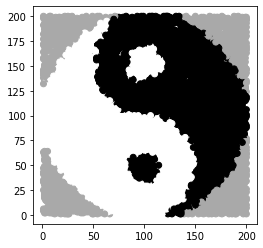

In [52]:
fig = plt.figure(figsize=(4,4))
plt.scatter(x_test[:,0],x_test[:,1],c = y_pred,cmap=matplotlib.colors.ListedColormap(colors))

訓練集圖型：


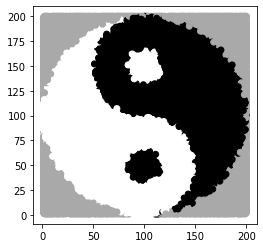

In [10]:
print("訓練集圖型：")
fig = plt.figure(figsize=(4,4))
plt.scatter(x_train[:,0],x_train[:,1],c = y_train,cmap=matplotlib.colors.ListedColormap(colors))

測試集圖型：


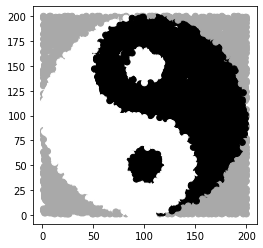

In [11]:
print("測試集圖型：")
fig = plt.figure(figsize=(4,4))
plt.scatter(x_test[:,0],x_test[:,1],c = y_test,cmap=matplotlib.colors.ListedColormap(colors))

In [ ]:
pd.read_csv()